## Лабораторная работа 10: Полиномиальная регрессия
Суть: Применение полиномиальной регрессии для моделирования нелинейных зависимостей между переменными.

Степени полинома: Уровень нелинейности модели (например, полином второй степени добавляет квадратичные зависимости).

Перегрузка (overfitting): Слишком точное подгоняние модели под данные, из-за чего она плохо обобщает новые данные.

Регуляризация (L1/L2): Методы для уменьшения сложности модели, чтобы избежать перегрузки.

Ошибка обучения и тестирования: Разница между результатами модели на обучающей и тестовой выборке; помогает определить пере- или недообучение.

Подключение библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
uploaded = files.upload()

Saving WineQT.csv to WineQT.csv


Загрузка данных

In [3]:
dataset = pd.read_csv('WineQT.csv')
print(dataset.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

Определяем переменные

In [4]:
X = dataset[['alcohol']].values  # Признаки
y = dataset['quality'].values    # Целевая переменная


1. Линейная регрессия

In [5]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

2. Полиномиальная регрессия для различных степеней полинома

<ipython-input-6-05f6cdb2bbee>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1).reshape(-1, 1)  # Создаем плотную сетку значений X
<ipython-input-6-05f6cdb2bbee>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1).reshape(-1, 1)  # Создаем плотную сетку значений X
<ipython-input-6-05f6cdb2bbee>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1).resh

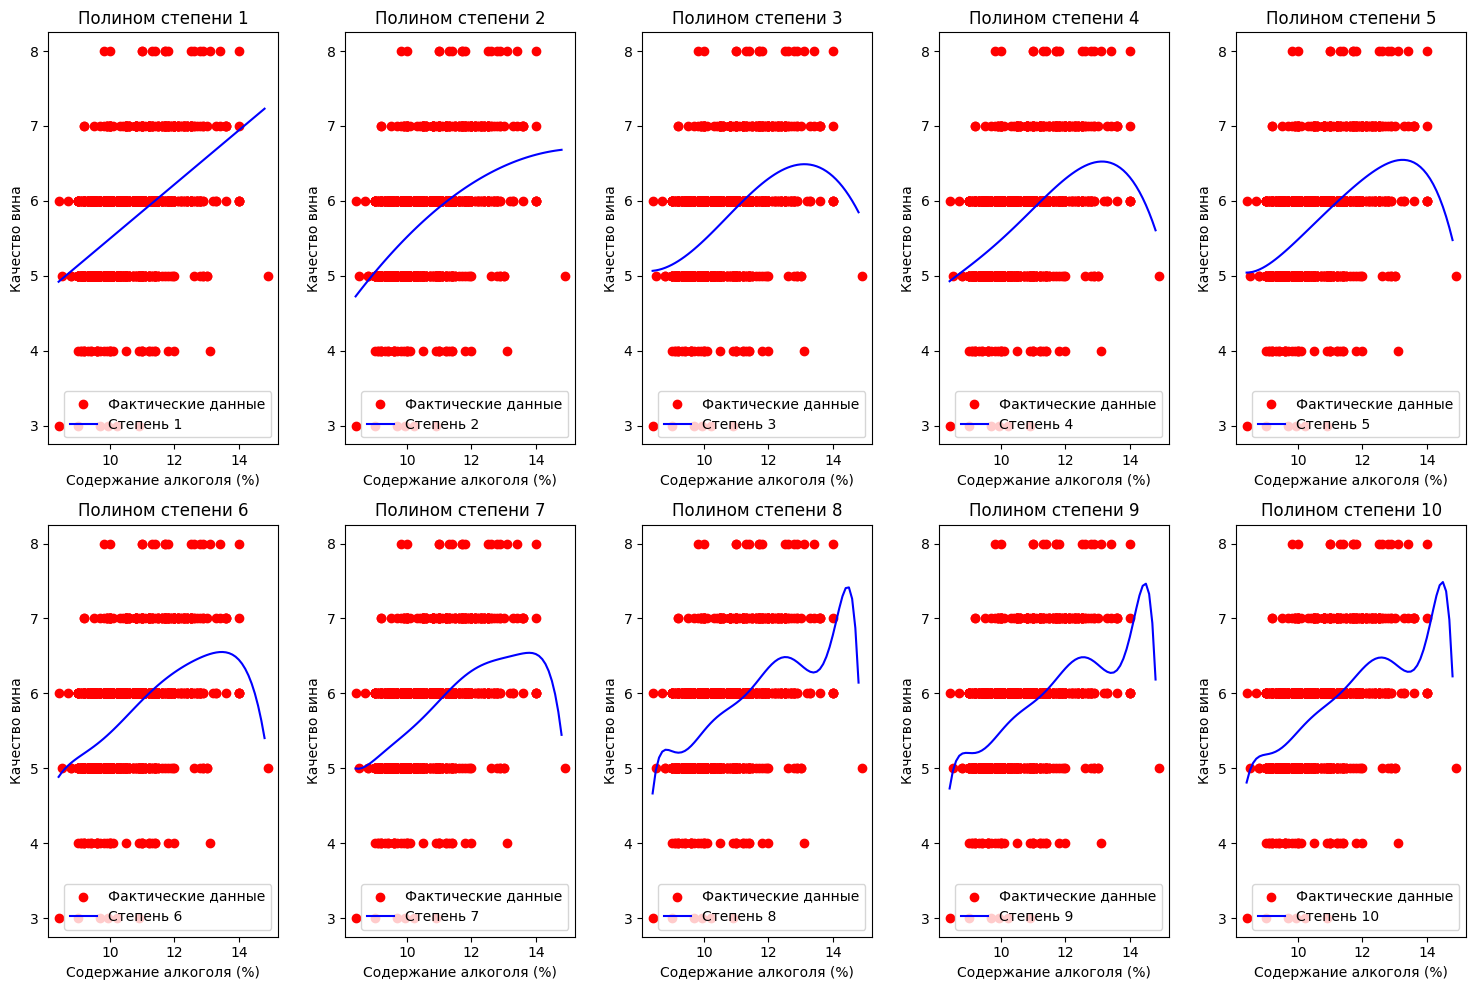

In [6]:
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Степени полинома
plt.figure(figsize=(15, 10))  # Размер графика

# Цикл по степеням полинома
for i, degree in enumerate(degrees, 1):
    # Генерация полиномиальных признаков
    poly_reg = PolynomialFeatures(degree=degree)
    X_poly = poly_reg.fit_transform(X)  # Создание полиномиальных признаков из X

    # Обучение модели полиномиальной регрессии
    lin_reg_poly = LinearRegression()
    lin_reg_poly.fit(X_poly, y)

    # Генерация кривой для текущей модели
    X_grid = np.arange(min(X), max(X), 0.1).reshape(-1, 1)  # Создаем плотную сетку значений X
    y_pred = lin_reg_poly.predict(poly_reg.transform(X_grid))

    # Построение графика
    plt.subplot(2, 5, i)  # Сетка 2x5 для графиков
    plt.scatter(X, y, color='red', label='Фактические данные')
    plt.plot(X_grid, y_pred, color='blue', label=f'Степень {degree}')
    plt.title(f'Полином степени {degree}')
    plt.xlabel('Содержание алкоголя (%)')
    plt.ylabel('Качество вина')
    plt.legend()

plt.tight_layout()  # Аккуратное расположение графиков
plt.show()


In [7]:
# Вывод метрик для анализа
from sklearn.metrics import mean_squared_error, r2_score

print("Анализ метрик для различных степеней полинома:")

# Перебор степеней полинома
for degree in degrees:
    # Создание полиномиальных признаков
    poly_reg = PolynomialFeatures(degree=degree)
    X_poly = poly_reg.fit_transform(X)

    # Обучение модели линейной регрессии
    lin_reg_poly = LinearRegression()
    lin_reg_poly.fit(X_poly, y)

    # Предсказания на полиномиальных признаках
    y_pred = lin_reg_poly.predict(X_poly)

    # Вычисление метрик
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Вывод результатов
    print(f"Степень полинома: {degree}")
    print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
    print(f"Коэффициент детерминации (R²): {r2:.2f}\n")


Анализ метрик для различных степеней полинома:
Степень полинома: 1
Среднеквадратичная ошибка (MSE): 0.50
Коэффициент детерминации (R²): 0.24

Степень полинома: 2
Среднеквадратичная ошибка (MSE): 0.49
Коэффициент детерминации (R²): 0.24

Степень полинома: 3
Среднеквадратичная ошибка (MSE): 0.49
Коэффициент детерминации (R²): 0.25

Степень полинома: 4
Среднеквадратичная ошибка (MSE): 0.49
Коэффициент детерминации (R²): 0.25

Степень полинома: 5
Среднеквадратичная ошибка (MSE): 0.49
Коэффициент детерминации (R²): 0.25

Степень полинома: 6
Среднеквадратичная ошибка (MSE): 0.49
Коэффициент детерминации (R²): 0.25

Степень полинома: 7
Среднеквадратичная ошибка (MSE): 0.49
Коэффициент детерминации (R²): 0.25

Степень полинома: 8
Среднеквадратичная ошибка (MSE): 0.49
Коэффициент детерминации (R²): 0.25

Степень полинома: 9
Среднеквадратичная ошибка (MSE): 0.49
Коэффициент детерминации (R²): 0.25

Степень полинома: 10
Среднеквадратичная ошибка (MSE): 0.49
Коэффициент детерминации (R²): 0.25



Анализ метрик показал, что с увеличением степени полинома среднеквадратичная ошибка (MSE) и коэффициент детерминации (R²) практически не изменяются.

MSE остается на уровне 0.49 после второй степени.
R² стабилизируется на значении 0.25, начиная с третьей степени.
Это говорит о том, что усложнение модели (повышение степени полинома) не приводит к улучшению качества предсказаний. Линейная и квадратичная модели оказываются такими же эффективными, как и более сложные полиномы.